In [17]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/boston_dataset.csv', sep='\s+', header =None)

In [24]:
df.head()

,0,1,2,4,5,6,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.538,6.575,65.2,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


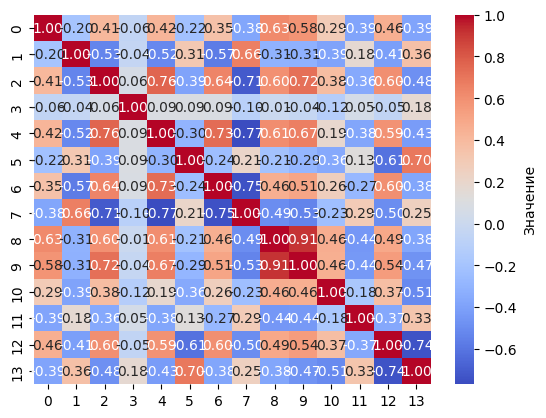

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Значение'})
plt.show()

В силу малой корреляции убираем 3 и 7 столбец

In [3]:
df = df.drop(columns=[3, 7])

In [4]:
y = df[13].values
X = df.drop(columns=[13]).values

In [ ]:
print(y)
print(X)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled.shape

(404, 11)

**Полносвязные нейронные сети (Dense Networks)**


In [20]:
# Создаем модель
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(11,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

# Компилируем модель
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

# Обучаем модель
model.fit(X_train_scaled, y_train, epochs=100)

# Оценим точность модели
test_loss, test_mse = model.evaluate(X_test_scaled, y_test, verbose=2)
print('\nТестовая точность:', test_mse)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 594.5045 - mean_absolute_error: 22.5347
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 585.2068 - mean_absolute_error: 22.0332
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 526.4021 - mean_absolute_error: 20.7510
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 488.4060 - mean_absolute_error: 19.6259
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 388.0327 - mean_absolute_error: 17.4114
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 312.7586 - mean_absolute_error: 15.3285
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 181.1628 - mean_absolute_error: 11.2398
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 127.7588 - mean_absolute_error: 8.8737
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 73.9749 - mean_absolute_error: 6.7234
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 50.9172 - mean_absolute_error: 5.5492
Epoch

In [21]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,645 (33.77 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,764 (22.52 KB)

In [22]:
predictions = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


In [23]:
predictions

array([[25.818033 ],
       [29.687834 ],
       [17.290451 ],
       [25.9356   ],
       [16.935722 ],
       [19.958616 ],
       [16.928072 ],
       [15.3376875],
       [28.002533 ],
       [16.22892  ],
       [19.767262 ],
       [19.20098  ],
       [ 6.6087317],
       [19.568258 ],
       [19.52761  ],
       [22.872715 ],
       [19.811577 ],
       [10.420352 ],
       [45.17517  ],
       [15.564582 ],
       [24.640984 ],
       [24.482735 ],
       [16.536472 ],
       [20.917404 ],
       [18.066534 ],
       [18.501064 ],
       [21.304996 ],
       [13.907956 ],
       [19.30825  ],
       [16.143915 ],
       [21.657267 ],
       [23.707582 ],
       [18.974947 ],
       [29.130238 ],
       [14.709498 ],
       [16.47531  ],
       [34.276913 ],
       [21.950062 ],
       [18.802664 ],
       [24.510223 ],
       [15.721769 ],
       [27.504082 ],
       [47.16586  ],
       [18.91484  ],
       [24.676775 ],
       [18.214172 ],
       [16.229156 ],
       [26.50

В модели используются 3 промежуточных слоя и веса обновляются после прохождения через модель партии из 10 примеров

In [28]:
model1 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(11,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model1.compile(optimizer='rmsprop',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

model1.fit(X_train_scaled, y_train, epochs=100, batch_size = 10)

test_loss, test_mse = model1.evaluate(X_test_scaled, y_test, verbose=2)
print('\nТестовая точность:', test_mse)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 537.4050 - mean_absolute_error: 21.2239
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 101.4522 - mean_absolute_error: 8.1495
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 35.5320 - mean_absolute_error: 4.5905
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.1955 - mean_absolute_error: 3.3827
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 18.9531 - mean_absolute_error: 3.2526
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 21.5079 - mean_absolute_error: 3.2799
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.2408 - mean_absolute_error: 2.8899
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.8847 - mean_absolute_error: 2.9724
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.4724 - mean_absolute_error: 2.6377
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.1799 - mean_absolute_error: 2.6986
Epoch 11/100
41/41 ━━━━━━

In [29]:
predictions = model1.predict(X_test_scaled)
predictions

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[23.369411 ],
       [30.060919 ],
       [12.816367 ],
       [23.851677 ],
       [14.954519 ],
       [21.171923 ],
       [18.920158 ],
       [13.127869 ],
       [22.450148 ],
       [17.857313 ],
       [22.661608 ],
       [21.661766 ],
       [ 5.419338 ],
       [22.517447 ],
       [19.329332 ],
       [18.799992 ],
       [17.973581 ],
       [ 9.218202 ],
       [46.220276 ],
       [11.899499 ],
       [23.632513 ],
       [24.404352 ],
       [14.394922 ],
       [20.847849 ],
       [14.107435 ],
       [14.943954 ],
       [22.218586 ],
       [11.808051 ],
       [19.04697  ],
       [19.117191 ],
       [22.19704  ],
       [23.098162 ],
       [16.685965 ],
       [25.272913 ],
       [12.949202 ],
       [14.2432165],
       [32.432655 ],
       [19.477165 ],
       [22.541174 ],
       [22.757154 ],
       [17.39316  ],
       [28.03902  ],
       [48.04441  ],
       [18.856522 ],
       [23.628088 ],
       [11.397398 ],
       [14.070113 ],
       [23.59

Вывод по сравнению двух нейронных сетей:
вторая модель показала лучшую точность 1.9966 (2.6350 в первой модели)

In [4]:
mnist = keras.datasets.mnist

In [8]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [9]:
# Нормализуем данные
train_images = train_images / 255.0
test_images = test_images / 255.0

# Создаем модель
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

# Компилируем модель
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Обучаем модель
model.fit(train_images, train_labels, epochs=10)

# Оценим точность модели
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nТестовая точность:', test_acc)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8819 - loss: 0.4233
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9665 - loss: 0.1142
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9780 - loss: 0.0742
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9839 - loss: 0.0549
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9877 - loss: 0.0405
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9894 - loss: 0.0336
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9918 - loss: 0.0272
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9942 - loss: 0.0203
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9953 - loss: 0.0163
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9962 - loss: 0.0134
313/313 - 1s - 2ms/step - accuracy: 0.9793 - loss: 0.0829

Тестовая точность: 0.9793000221252441


In [16]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Компилируем модель
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.AUC()])

# Обучаем модель
model2.fit(train_images, train_labels, epochs=10, batch_size = 20)

# Оценим точность модели
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)
print('\nТестовая точность:', test_acc)

Epoch 1/10


ValueError: Argument `segment_ids` and `data` should have same leading dimension. Got (200,) v.s. (20,).

Реализация класса

In [18]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [19]:
def sigmoid_derivative(x):
    return x * (1 - x)

In [20]:
learning_rate = 0.1

def update_weights(weights, gradients):
    return weights - learning_rate * gradients

In [29]:
class Neuron:
    def __init__(self, input_size, activation='sigmoid'):
        self.weights = np.random.randn(input_size + 1) * 0.1  # +1 для смещения (bias)
        self.activation_function = self._get_activation_function(activation)
        self.activation_derivative = self._get_activation_derivative(activation)

    def _get_activation_function(self, activation):
        if activation == 'sigmoid':
            return lambda x: 1 / (1 + np.exp(-x))
        elif activation == 'tanh':
            return np.tanh
        elif activation == 'relu':
            return lambda x: np.maximum(0, x)

    def _get_activation_derivative(self, activation):
        if activation == 'sigmoid':
            return lambda x: x * (1 - x)
        elif activation == 'tanh':
            return lambda x: 1 - np.tanh(x)**2
        elif activation == 'relu':
            return lambda x: np.where(x > 0, 1, 0)

    def activate(self, inputs):
        z = np.dot(inputs, self.weights[:-1]) + self.weights[-1]
        self.output = self.activation_function(z)
        return self.output

In [35]:
class Network:
    def __init__(self, layers):
        self.layers = layers

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X

    def backward(self, X, y, learning_rate):
        # прямое распространение для получения выходных значений
        output = self.forward(X)

        # вычисление ошибки на выходном слое
        error = y - output
        self.layers[-1].error = error
        self.layers[-1].delta = error * self.layers[-1].neurons[0].activation_derivative(output)

        # передача ошибки обратно через слои
        for i in reversed(range(len(self.layers) - 1)):
            layer = self.layers[i]
            next_layer = self.layers[i + 1]
            layer.error = np.dot(next_layer.delta, np.array([neuron.weights[:-1] for neuron in next_layer.neurons]))
            layer.delta = layer.error * np.array([neuron.activation_derivative(neuron.output) for neuron in layer.neurons])

        # обновление весов
        for i in range(len(self.layers)):
            layer = self.layers[i]
            inputs = X if i == 0 else self.layers[i - 1].output
            for j, neuron in enumerate(layer.neurons):
                for k in range(len(neuron.weights) - 1):
                    neuron.weights[k] += learning_rate * layer.delta[j] * inputs[k]
                neuron.weights[-1] += learning_rate * layer.delta[j]  # Обновление смещения


    def train(self, X, y, learning_rate, epochs):
        for epoch in range(epochs):
            for xi, yi in zip(X, y):
                self.backward(xi, yi, learning_rate)

In [31]:
class Layer:
    def __init__(self, num_neurons, input_size, activation='sigmoid'):
        self.neurons = [Neuron(input_size, activation) for _ in range(num_neurons)]

    def forward(self, inputs):
        self.output = np.array([neuron.activate(inputs) for neuron in self.neurons])
        return self.output

In [36]:
input_size = 3
hidden_size = 5
output_size = 1
epochs = 1000

layer1 = Layer(hidden_size, input_size, activation='relu')
layer2 = Layer(output_size, hidden_size, activation='sigmoid')

network = Network([layer1, layer2])

In [25]:
X1 = np.array([[0.5, 0.1, 0.4], [0.9, 0.7, 0.3], [0.2, 0.8, 0.6]])
y1 = np.array([[1], [0], [1]])

In [37]:
network.train(X1, y1, learning_rate, epochs)

In [38]:
for xi in X1:
    output = network.forward(xi)
    print("Input:", xi, "Output:", output)

Input: [0.5 0.1 0.4] Output: [0.9359413]
Input: [0.9 0.7 0.3] Output: [0.14007375]
Input: [0.2 0.8 0.6] Output: [0.96174003]
